In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
#for dickey-fuller test
import statsmodels.tsa.stattools as sts
#to check seasonality in dataset
from statsmodels.tsa.seasonal import seasonal_decompose
#for autocorrelation 
import statsmodels.graphics.tsaplots as sgt
#for estimation of future values
from statsmodels.tsa.arima.model import ARIMA
sns.set()

#for chi square test
from scipy.stats.distributions import chi2

#for model evaluation
from sklearn.metrics import mean_squared_error
#for warnings
import warnings

warnings.filterwarnings("ignore")

In [106]:
#importing the data
df= pd.read_csv('Index2018.csv')

In [107]:
#lets make copy-- to make changes in it
df_copy= df.copy()

### Examining the Dataset

In [108]:
df_copy.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


spx--->Measure of US stock Exchange

dax--->Measure of German stock Exchange

ftse--->Measure of London stock Exchange

Nikkei--->Measure of Japanese stock Exchange

In [109]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [110]:
#some statistical information
df_copy.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [111]:
#checking for the null values
df_copy.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Plotting the Data

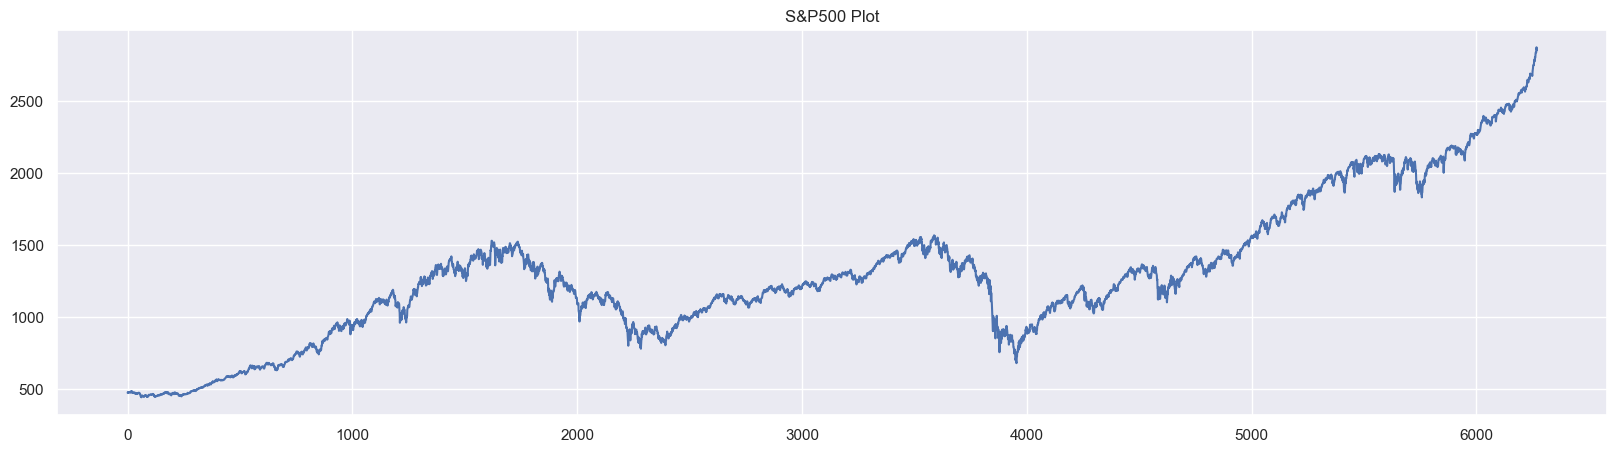

In [112]:
#lets simply plot spx first alone
df_copy['spx'].plot(figsize= (20,5), title= 'S&P500 Plot')
plt.show()

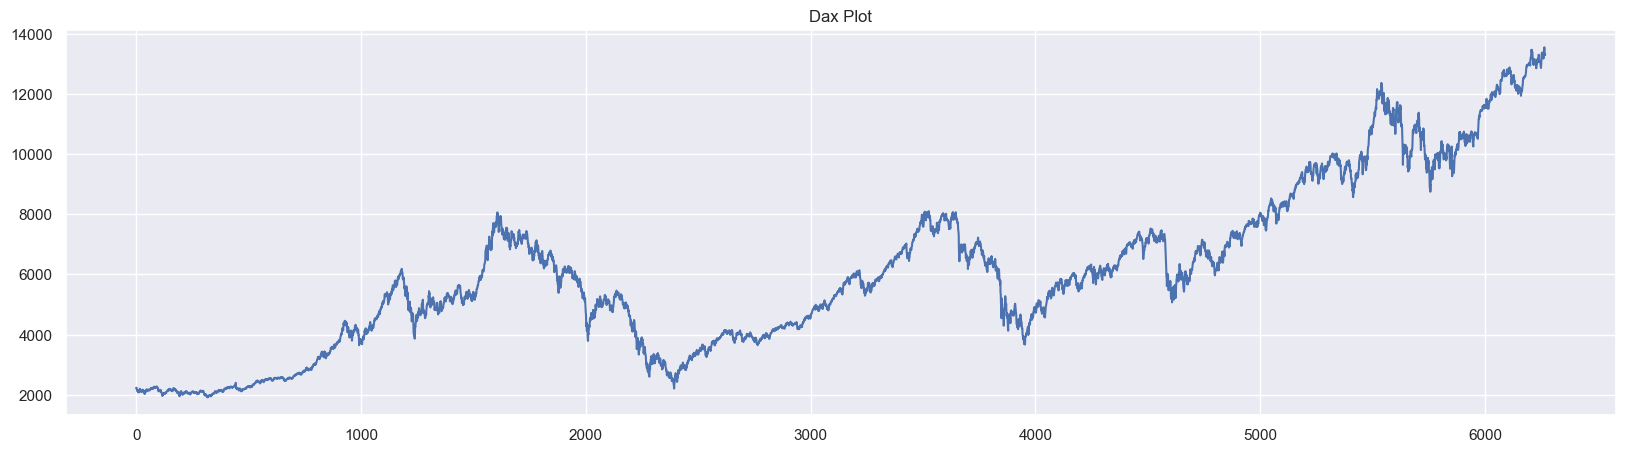

In [113]:
#lets plot dax
df_copy['dax'].plot(figsize= (20,5), title= 'Dax Plot')
plt.show()

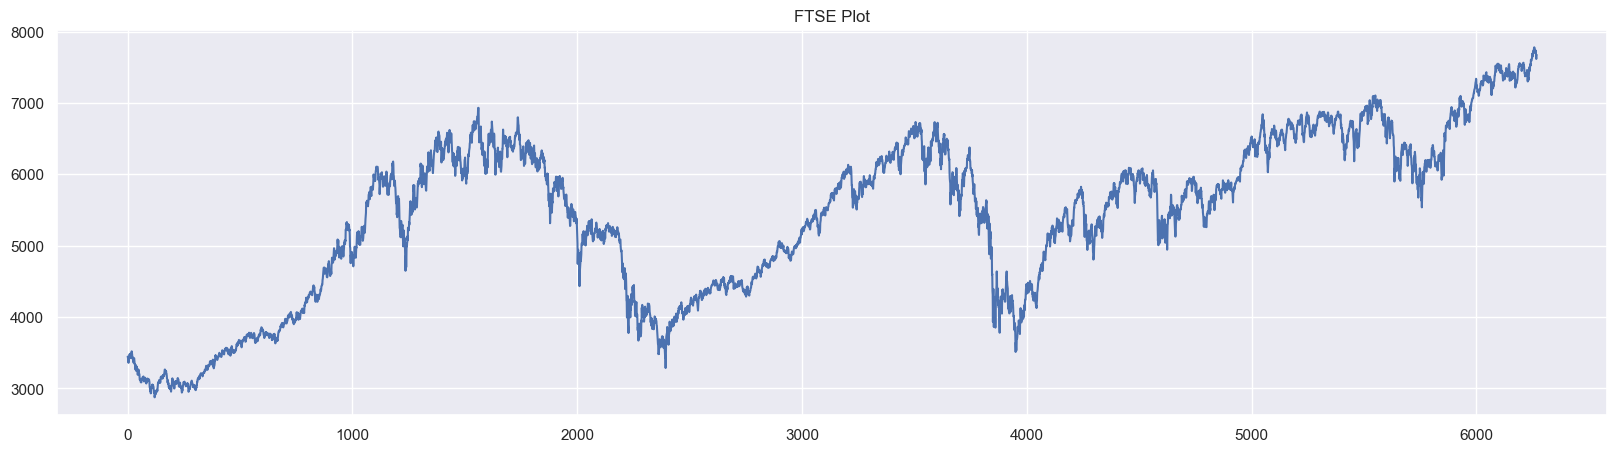

In [114]:
#lets plot ftse
df_copy['ftse'].plot(figsize= (20,5), title= 'FTSE Plot')
plt.show()

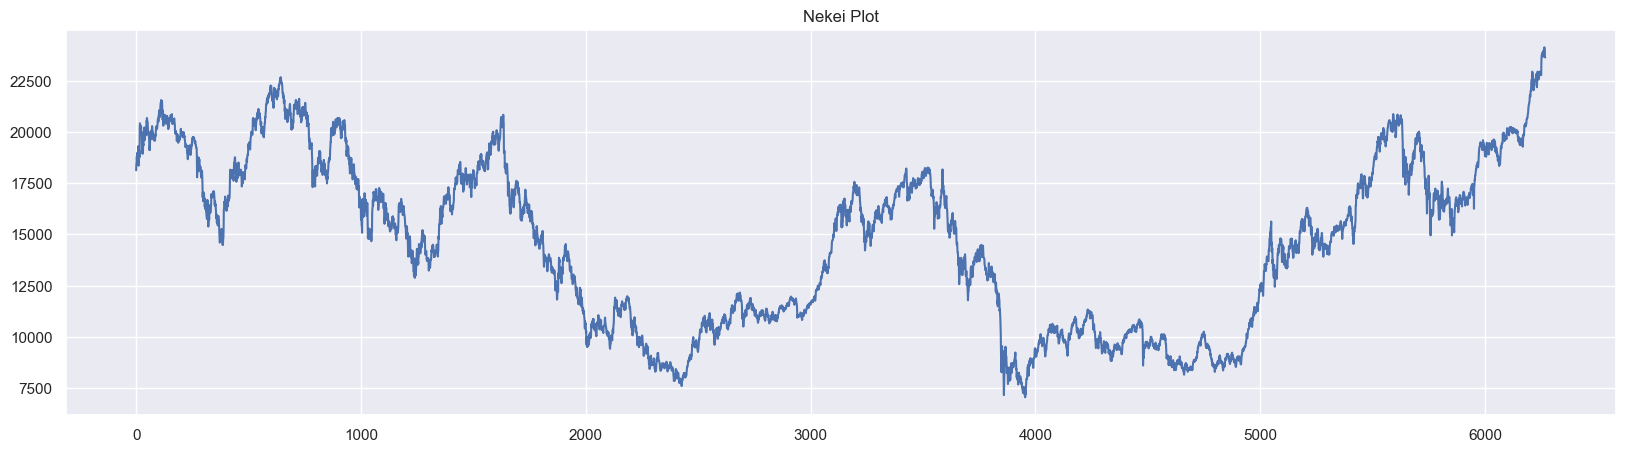

In [115]:
#lets plot Nekei
df_copy['nikkei'].plot(figsize= (20,5), title= 'Nekei Plot')
plt.show()

If you want to compare two stock exchanges, You can plot them on one plot.

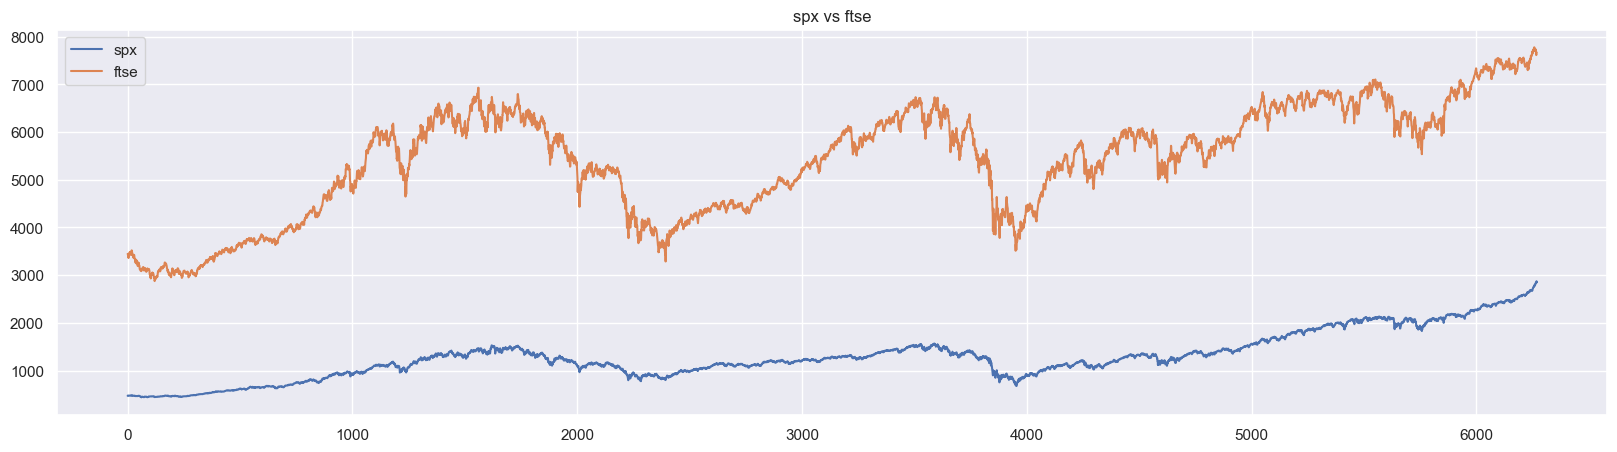

In [116]:
#lets plot spx and ftse
df_copy['spx'].plot(figsize= (20,5))
df_copy['ftse'].plot(figsize= (20,5))
plt.title('spx vs ftse')
plt.legend()
plt.show()

spx looks much stable and ftse has high and low peaks.

#### QQ Plot:

Quantile-Quantile Plot is used to determine whether a dataset is distributed in a certain way.Usually show how data fits to Normal Distribution.

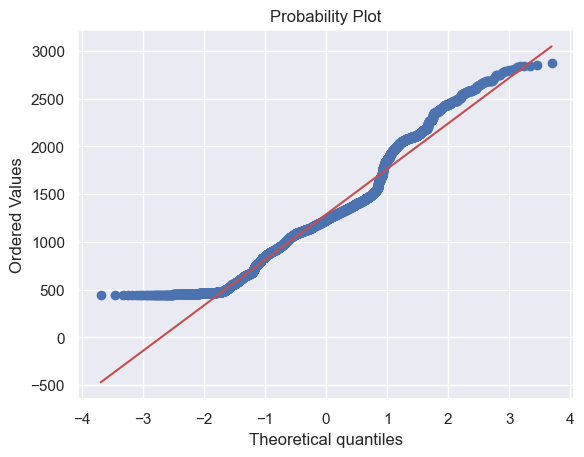

In [117]:
#we will use probplot
#first arg will be of series we want to check 
#second arg will show how we want to express plot
scipy.stats.probplot(df_copy['spx'], plot= pylab)
pylab.show()

On  y-axis we have the price, and on x-axis show that how many standard deviation away from the mean these values are. Red line show what path data points should follow for the Normal Ditribution.

### Transofrming the Dataframe to a Time Series

##### Changing Data Type of Date Column:

In [118]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


As you can see the date column is not in the date data type.

In [119]:
df_copy['date'].describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [120]:
#converting data type of date column to date
#as in our data we have format like day/month/year so we have to specify that
df_copy['date']= pd.to_datetime(df_copy['date'], dayfirst= True)

In [121]:
df_copy['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6269 entries, 0 to 6268
Series name: date
Non-Null Count  Dtype         
--------------  -----         
6269 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 49.1 KB


In [122]:
df_copy['date'].describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

###### Setting the date as Index:

We have to set our index to date so that We can make it time series as every value will refer to a date instead of an integer index.

In [123]:
df_copy.set_index('date', inplace= True)

In [124]:
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


###### Setting the desired Frequency:

Frequency is basically how often the new data point was collected/stored, it can be a day, a month, a year.
For Example: We store Cost of an Item for every day.

It is important to have constant frequency for Time Series Analysis.

We have a pandas function with which we can set frequency, It takes string aruguement:
                'h'=data collected hourly
                
                'd'=data collected daily
                'w'=data collected weekly
                'm'= monthly
                'a'= yearly
                'b' = daily but skip holidays (Saturday and sunday) --Only Business Days

In [125]:
#our data use data sotred on the daily basis so we use 'd' as frequency
#as its about stock so we will skip holidays
df_copy= df_copy.asfreq('b')

In [126]:
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


So it make the dataset on the daily basis even if it does not have data for that day.

###### Handling Missing Values in the Dataset:

In [127]:
#now checking for null values
df_copy.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

So now you can see that we have 8 Nulls in every col.

We will fill these values with fillna() method.

            1. Front filling: Assign the value of Previous period (data point)
            2. Back filling: Assign the value of Next period
            3. Assign same value to all missing values
            

In [128]:
#applying front filling on spx
df_copy['spx']= df_copy['spx'].fillna(method= "ffill")

#applying back filling on ftse
df_copy['ftse']= df_copy['ftse'].fillna(method= "bfill")

#giving mean value to missing values of dax
df_copy['dax']= df_copy['dax'].fillna(value= df_copy['dax'].mean())

#applying back filling on nikkei
df_copy['nikkei']= df_copy['nikkei'].fillna(method= "bfill")


In [129]:
df_copy.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Simplifying the Dataframe

Our purpose is to Analyze how spx (S&P 500 of US) performs, so rest of the stocks of no use to us.

In [130]:
#market values we are interested in are spx-- so store it in new col
df_copy['marker_value'] = df_copy.spx

In [131]:
#now delete all other columns
del df_copy['spx'], df_copy['dax'], df_copy['ftse'], df_copy['nikkei']

In [132]:
df_copy.head()

,marker_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### Splitting the Dataset

We will make training and test sets so that we can test our model on unseen data.

In Machine Learning we shuffle the data before spliiting, but in Time Series we will keep the data in same choronological order(from earliest data point collected to latest data point collected).

So we will choose a cut off point, data before that point will be considered as Training and data after that point will considered as Testing data.

In [133]:
#We will make trainig set size of 80% and test set size will be 20%
#size will give us point until which we have our 80% data
size= int(len(df_copy) * 0.8)

In [134]:
#so training data
df_train= df_copy.iloc[:size]
#testing data
df_test= df_copy.iloc[size:]

In [135]:
df_train.tail()

,marker_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [136]:
df_test.head()

,marker_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


Now our Pre-procssing for the series is Completed.

### White Noise

White Noise is something in which we do not have autocorrelation in the data means there is not relation between past and present values of data, as main fact of Time series Forecasting is that Present Patterns are repeated in Future means they have relevance.

In White Noise there is no relevance so we can not predict.

Lets generate the white noise caomparable to our spx time series and compare to know more about it.

To make it comparable with our spx distribution, we have to set its mean, standard deviationa and size to as of our spx.

In [137]:
#loc take average point of the distribution
#scale tell how wide the distribution is (standard deviation)
#size same as spx
white_noise= np.random.normal(loc= df_train.marker_value.mean(), 
                             scale= df_train.marker_value.std(),
                             size= len(df_train))

#adding that white noise as col in data frame
df_train['White_noise'] = white_noise

C:\Users\DELL\AppData\Local\Temp\ipykernel_6128\3789501403.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['White_noise'] = white_noise


In [138]:
df_train.describe()

,marker_value,White_noise
count,5021.000000,5021.000000
mean,1091.651926,1098.417062
std,292.559287,295.474622
min,438.920000,72.136113
25%,914.620000,905.413334
50%,1144.650000,1094.607514
75%,1316.280729,1294.396027
max,1570.252238,2144.984442


As you can see mean of both does not match becuase, every value was generated arround the mean but by taking average of all noise points does not make upto that mean.

Lets plot white noise to better understand it.

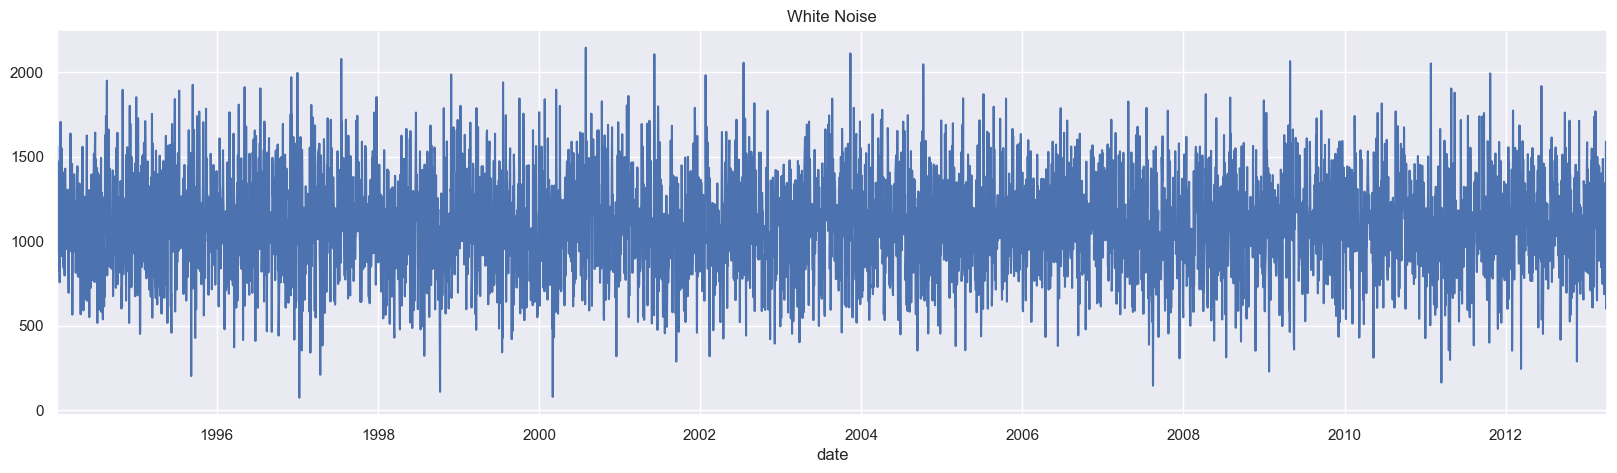

In [139]:
df_train['White_noise'].plot(figsize= (20,5), title= 'White Noise')
plt.show()

Lets plot the sxp to compare it with white noise.

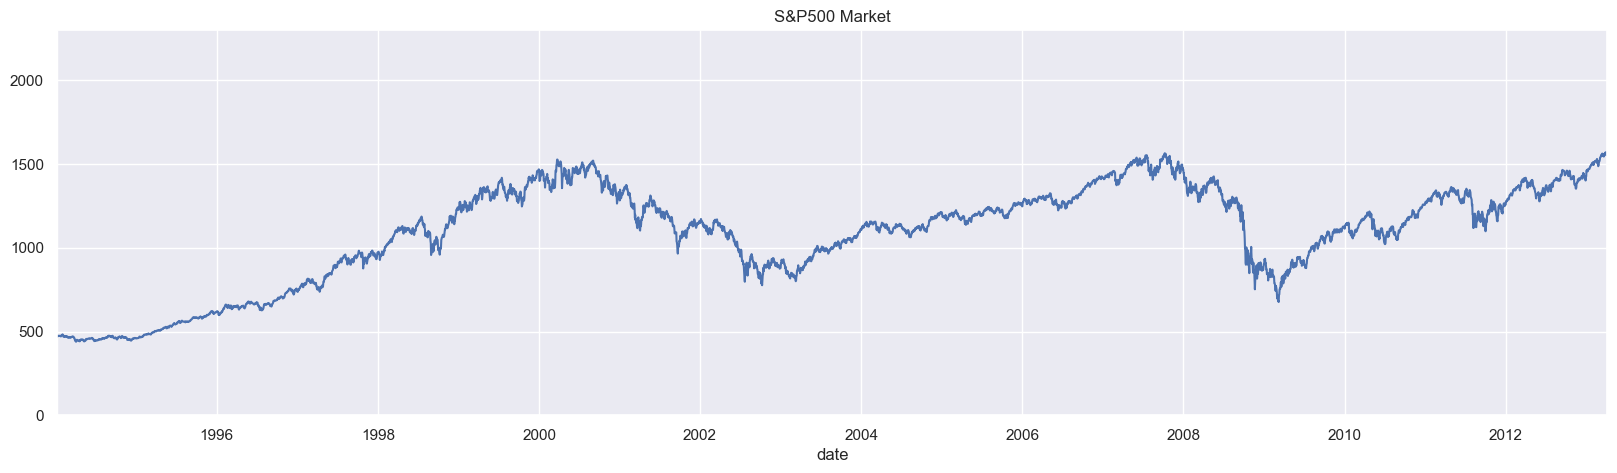

In [140]:
df_train['marker_value'].plot(figsize= (20,5), title= 'S&P500 Market')
#as plot of white noise is from 0 to approx 2300 lets make s&p also have same y-axis for better comparison
plt.ylim(0,2300)
plt.show()

### Random Walk:

A special type of time series where Value for Past Period is continued with some White noise.

It means that Current time period value will be equal to Past time period value plus some white noise.
                    
                       P(current) = P(current - 1) + white_noise

So due to that noise we can not predict the future value with the accuracy.

In [141]:
#importing file to demonstrate random walk
random_walk= pd.read_csv('RandWalk.csv')
random_walk.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [142]:
random_walk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7029 entries, 0 to 7028
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7029 non-null   object 
 1   price   7029 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.0+ KB


In [143]:
#changing data type of date
random_walk.date= pd.to_datetime(random_walk.date, dayfirst= True)

#setting date as the index of the random walk
random_walk.set_index(random_walk.date, inplace= True)

#setting the frequency as business days
random_walk= random_walk.asfreq('b')

In [144]:
#adding random walk in our df_train
df_train['random_walk']= random_walk.price

C:\Users\DELL\AppData\Local\Temp\ipykernel_6128\195431513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['random_walk']= random_walk.price


In [145]:
df_train.head()

,marker_value,White_noise,random_walk
date,,,
1994-01-07,469.90,1561.083608,1122.139662
1994-01-10,475.27,1126.940278,1080.347860
1994-01-11,474.13,1472.834450,1082.095245
1994-01-12,474.17,1133.303311,1083.639265
1994-01-13,472.47,939.407838,1067.146255


Lets plot the Random Walk and sxp(market value) to compare:

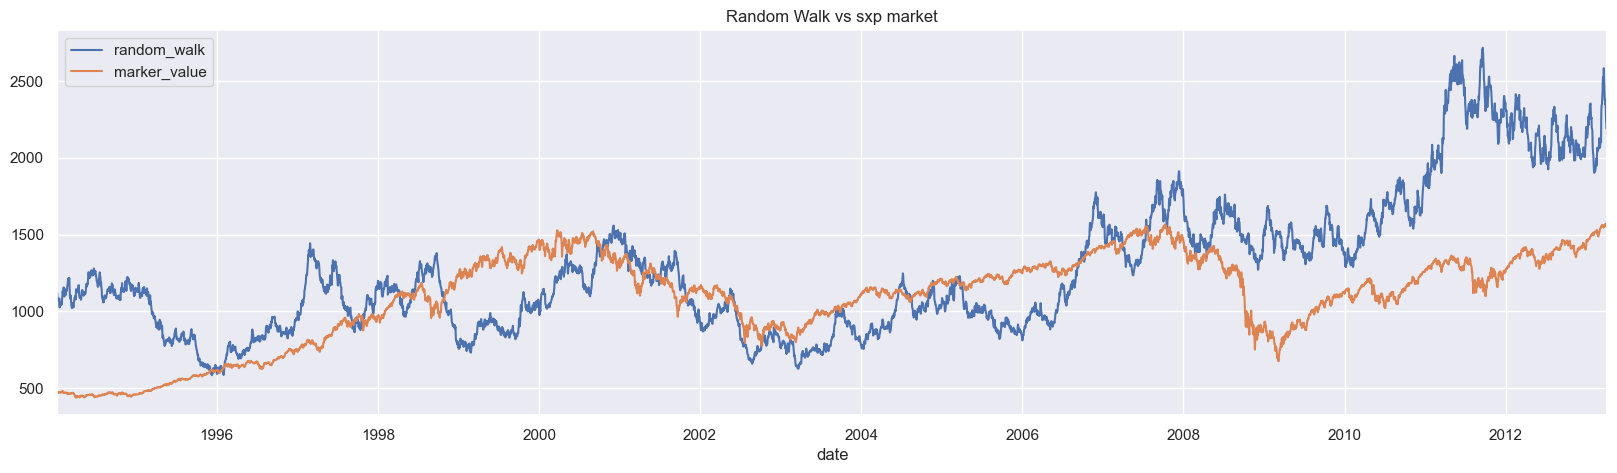

In [146]:
df_train.random_walk.plot(figsize= (20,5))
df_train.marker_value.plot()
plt.title('Random Walk vs sxp market')
plt.legend()
plt.show()

So both look pretty similar.

### Dickey-Fuller Test (DF Test)

Basically Dickey Fuller test is done to check if the data fill-full the Covariance Stationarity or not.

**Co-variance Stationarity:** It says if we have equal number of data points in different intervals like if we have data points **a1, a2, a3, a4, a5, a6, a7, a8** and we choose **a2, a3, a4** and **a3, a4, a5** then the Covariance (that means relation between two) will be same.Also **Mean of data points will be 0** and **Variance will be Constant** (that mean spread between datapoints will be same).

**Null Hypothesis of Dickey-Fuller Test:** Non stationarity (data does not fill-full assumptions of Stationarity).
If test statistics < critical value from dickey-fuller table then we reject the Null hypothesis and accept **Alternate Hypothesis** which says that data comes from stationer process.


In [147]:
#applying dickey-fuller test on market-size
sts.adfuller(df_train.marker_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

**First Value = -1.736984745235244** ===> We get the Test Statistics (this value will be compared with Critical Value and if -1.73698<Critical value then we reject null hypothis and data will stationer)
    
    
**Second Value = 0.41216456967706194** ===> Show the p-value that means 41 % chance to not reject the Null Hyposthis which overall means that there are 41% chances that Time Series comes from Covariance Stationer Process.
    
**Third Value = 18** ===> Autocorrelation go back to 18 periods (We will consider it while picking up model)
    
**Fourth Value = 5002** ===> Number of observations used in the Analysis.

**Dictionary =  {'1%': -3.431658008603046,
      '5%': -2.862117998412982,
      '10%': -2.567077669247375}** ====>Shows the 1, 5 and 10 % confidence level critical values from dickey fuller table so that we can compare them with Testing statistics or first value.
      
                            As -1.736984745235244 is larger than any value in 
                            different values of level of significance that                                
                            means We will not reject the Null Hypothesis and 
                            Market Value time series does not show Covariance 
                            Stationarity.
         
         
**Last value = 39904.880607487445** ===> Shows there is some apparent autocorrelation, Lower the value it is easier to predict values in future.

Lets run the same test for the White Noise Data:

In [148]:
sts.adfuller(df_train.White_noise)

(-71.7405554573313,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70913.44897766666)

**As you can We have to reject the Null Hypothesis ->as there is 0% to not reject Null Hypothesis and also -51 is smaller than any value of significance level so that mean we have to reject Null hyposthesis and Data has Covariance Stationarity.**

For the Random Walk Data:

In [149]:
sts.adfuller(df_train.random_walk)

(-1.3286073927689714,
 0.6159849181617386,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

**Now we have 61% of chances to not reject Null Hypothesis, and -1.32 is larger than any value in 3 significan levels so we Accept the Null Hypothesis and we will say data does not have Covariance Stationer.**

### Seasonality

Seasonality in dataset means that Trend appears in Cyclical Basics.

    For Example: Temperature depends on Time of day and Months of the Year.
We can perform decomposition on time series to test if there is Seasonality in the dataset or not.
    
    We decompose time series into Trend(Pattern followed), Seaonal (Cyclic effect) and Residual Effect (error).
Then We can use Naive Additive or Naive Multiplicative decomposition to check for seasonality.

    1. In Naive Additive we say that original series is addition of Trend, Seasonal, and Residual Effect.
    2. In multiplicative we say that original series is multiplication fo Trend, Seasonal, and Residual Effect.
    

We will use Seasonal_decompose() which will time series and will split it into three part discussed above.

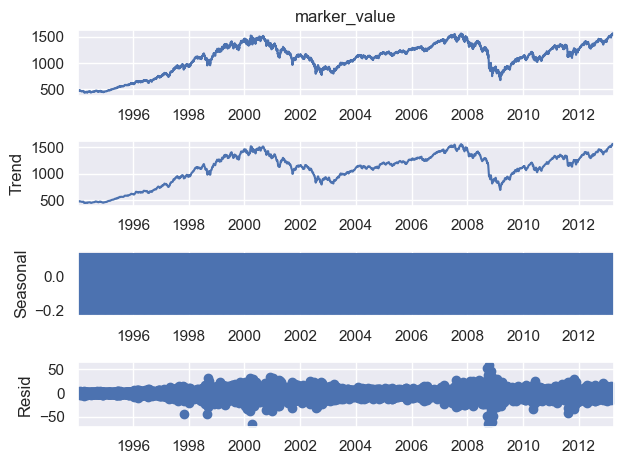

In [150]:
seasonal_decomposition_additive= seasonal_decompose(df_train.marker_value, model= 'additive')
#plotting
seasonal_decomposition_additive.plot()
plt.show()

Seasonal Rectangle graph shows that there is no cyclic Pattern in the dataset.

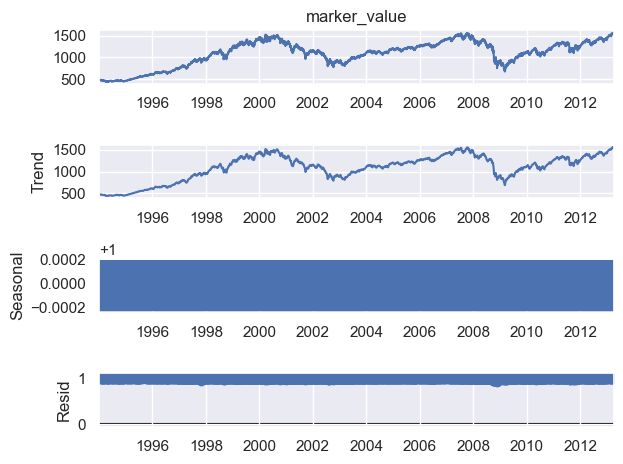

In [151]:
#lets try multiplicative 
seasonal_decompose_multiplicative= seasonal_decompose(df_train.marker_value, model= "multiplicative")
seasonal_decompose_multiplicative.plot()
plt.show()

### AutoCorrelation Factor

In time series auto-correlation is a very vital factor.

   Basically **Correlation** is Similarity between the change of values of two time Series.

 **AutoCorrelation** means how current data is correlated or resemble with previous data of same time series.
 
    Time Series where data points are autocorrelated mean current is similar to previous, it is known as lagged time series.
    It is known as lagged because current data is just delayed version of previous data point.
        

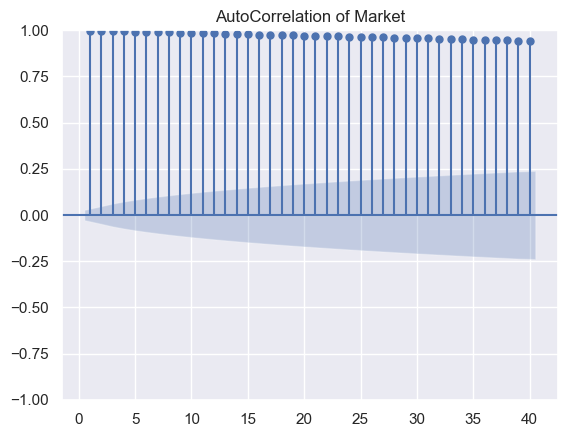

In [156]:
#to find autocorrelation in the time series, we will use tsaplot package of graphics

#Basically in default it will check all previous points relation with current
#but we can change through lag arguement

#common practice is to analyze first 40 lags-->that mean last 40 data points(or data of last 40 periods than our current)

#zero= False means we do not want to add correlation of same values becuase it will be always 1
sgt.plot_acf(df_train.marker_value, lags= 40, zero= False)

plt.title('AutoCorrelation of Market')
plt.show()

        x-axis represnt lags(previous points) as they are 40 that were specified by us.
        y-axis represent values of autocorrelation.
        
      First line on left which is 1 shows the Autocorrelation of a(t) data point with a(t-1) means 1 period back and so on.
      
      The blue are on x-axis show overall autocorrelation, as you can see we move backward more distance is increasing, means values are getting different.


Lets examine Autocorrelation of White Noise so we can differentiate well:

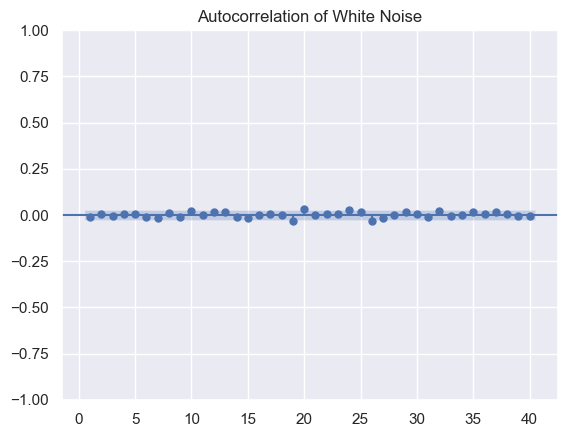

In [157]:
sgt.plot_acf(df_train.White_noise, lags= 40, zero= False)

plt.title("Autocorrelation of White Noise")
plt.show()

So as we know in white noise next entery is different from previous and we can estimate current data value from past, that can be seen by their autocorrelation.

Lets check autocorrelation of Random Walk:

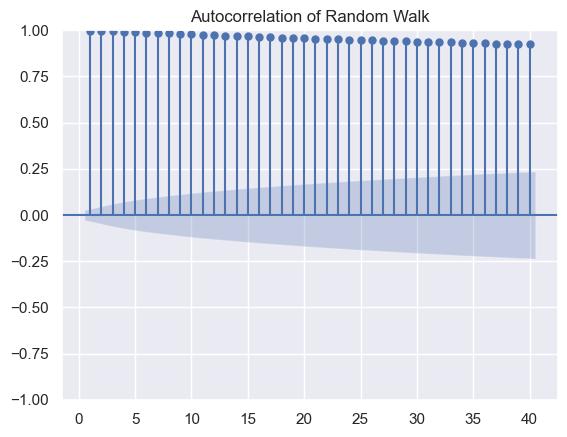

In [158]:
sgt.plot_acf(df_train.random_walk, lags= 40, zero= False)
plt.title("Autocorrelation of Random Walk")
plt.show()

We can see auto correlation is random walk too as it is a time series where values stays same thorugh out time series with some white noise.

### Partial Auto Correlation

So If we want to find direct effect of any previous data point on current (relation  between them) we use Partial Autocorrelation.
            
            For Example:
                a1, a2, a3, a4, a5
       We want to find AutoCorrelation between a1 and a5 so this direct version can be found with Parital Autocorrelation.
                       

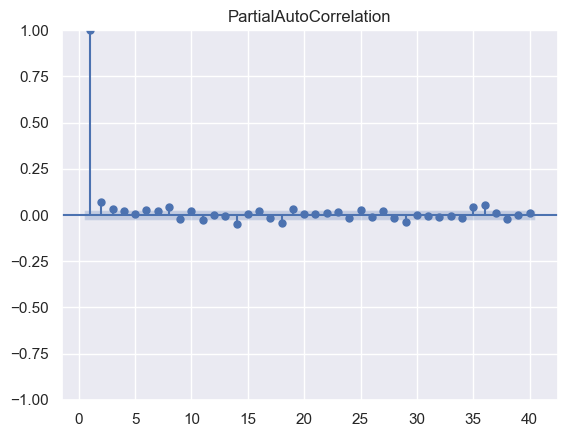

In [161]:
#ols is one of method of finding partical auto corr
sgt.plot_pacf(df_train.marker_value, lags= 40, zero= False, method=('ols'))
plt.title('PartialAutoCorrelation')
plt.show()

As you can see it has change alot than autocorrelation because, In auto correlation we were seeing effect like:
                
                if data points are:
                         d1, d2, d3, d4, d5
                         In Autocorrelation: we were seeing affect of d2 on d5 like:
                                 d2--->d3--->d4--->d5
                                 (Like we have enter connected data points in middle)
                                 
                         But in Partial AutoCorrelation:
                                  d2--->d5
                                  (We see direct affect of d2 on d5)
                 Thats why everything has changed alot.

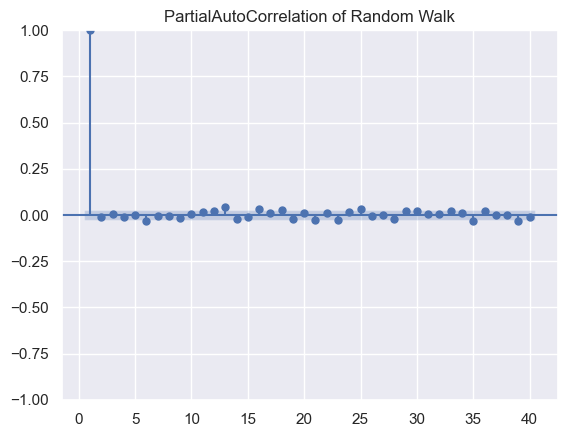

In [162]:
#plotting Partial Autocorrelation of Random Walk
sgt.plot_pacf(df_train.random_walk, lags= 40, zero= False, method=('ols'))
plt.title('PartialAutoCorrelation of Random Walk')
plt.show()

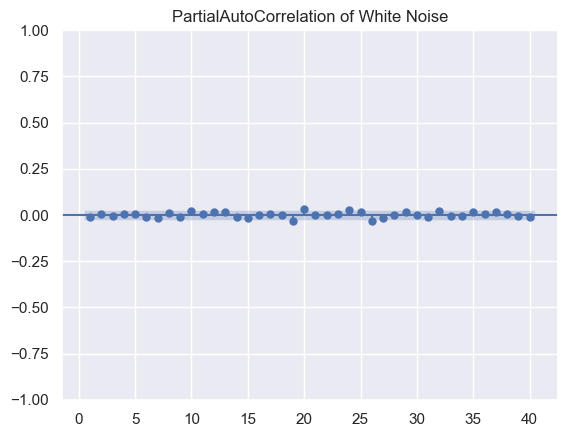

In [163]:
#Partial Autocorrelation of White Noise
#ols is one of method of finding partical auto corr
sgt.plot_pacf(df_train.White_noise, lags= 40, zero= False, method=('ols'))
plt.title('PartialAutoCorrelation of White Noise')
plt.show()

Even Last data point is not related to it(according to properties of white noise)

**Now We will move towards models that helps us to Estimate Future Values**

## Models

### 1- The AutoRegressive Model

It is a linear model where predicted value is result of addition of previous selected values of time, multiplied with numerical factor.

                                x(t)= C+ (num_cost * x(t-1))+ resiual
               -num_cost must be in between -1 to 1.
               -It is important to specify how many previous time period's values to be cosidered to find value for the x(t)
               -So the value of number of Lags specified via autocorrelation and Partial autocorrelation.
               

We will use Prtial Correlation becuase we want to see direct relation of each time period on current so it will be easy to decide number of lags.
So, again if we see Partical Autocorrelation of Market_size time series.

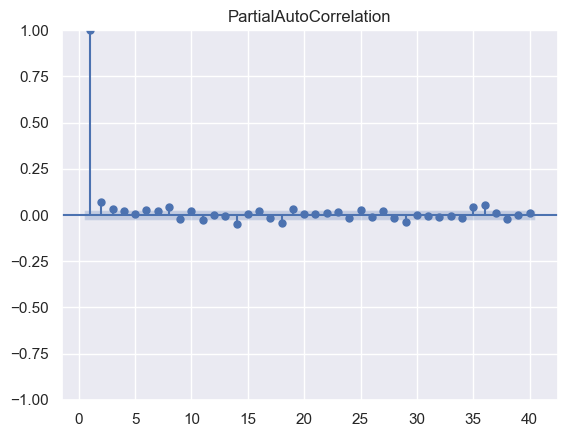

In [164]:
#ols is one of method of finding partical auto corr
sgt.plot_pacf(df_train.marker_value, lags= 40, zero= False, method=('ols'))
plt.title('PartialAutoCorrelation')
plt.show()

So (t-1) period is most significant, rest after 20 most are 0 or negative so very least significant.

**Lets use 1 previous time period value which is most significant to make a AutoRegressor model**
#### AR(1) Model:
        
        This model will use only 1 previous period to predict the current value.
**This type of model is also known as Simple AR Model**

In [190]:
#we will use ARMA that we have imported
            #pass the data
            #1 in order specifies that we are taking only 1 past value to predict current
            #0 in order specifies that we are taking no residual value into consideration
ar_model= ARIMA(df_train.marker_value, order= (1,0,0))

In [191]:
#finding most coefficients values (coefficient like C and num_const)
ar_results= ar_model.fit()

In [192]:
    ar_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           marker_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -20097.439
Date:                Fri, 17 Nov 2023   AIC                          40200.879
Time:                        14:53:52   BIC                          40220.443
Sample:                    01-07-1994   HQIC                         40207.734
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6133    165.184      6.608      0.000     767.859    1415.368
ar.L1          0.9992      0.001   1695.378      0.000       0.998       1.000
sigma2       175.2480      1.771     98.978      0.000     171.778     178.718
===================================================================================
Ljung-Box (L1) (Q):                  24.60   Jarque-Bera (JB):              7473.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Rows:

     -const represent C
     -ar.L1 is num_const value
    
Cols:

    -coef have the value that was set by the model for each coefficient.
    -std err tells us how far away models prediction are from actual values.
    -z contains associated test-statistics for significance.
    -P>|z|: This column provides the p-value associated with the z-statistic. It tests the null hypothesis that the coefficient is equal to zero. A low p-value (typically below a chosen significance level, often 0.05) suggests that you can reject the null hypothesis.
    -Last two column represent critical values for 95% confidence. If 0 is not part of it we can say that coefficients are significant.
    
    
    

**Now we will move towards more complex models, by adding more previous time period's values.**

##### AR(2) Model:

In [193]:
#just change 1 to 2 (to add 1 extra time period value)
ar_model_2= ARIMA(df_train.marker_value, order= (2,0,0))
ar_results_2= ar_model_2.fit()
ar_results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           marker_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -20085.289
Date:                Fri, 17 Nov 2023   AIC                          40178.578
Time:                        14:53:58   BIC                          40204.664
Sample:                    01-07-1994   HQIC                         40187.719
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6076    223.344      4.888      0.000     653.862    1529.353
ar.L1          0.9300      0.009     99.031      0.000       0.912       0.948
ar.L2          0.0694      0.009      7.405      0.000       0.051       0.088
sigma2       174.3966      1.768     98.654      0.000     170.932     177.861
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              7475.27
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

        Now see that we have a value for const, ar.L1 for (t-1) and ar.L2 for (t-2).

        As ar.L2 has very small value of 0.06 that mean (t-2) is not very significant for current period value.

##### AR(3) Model:

In [197]:
#we will consider (t-1), (t-2), (t-3)
ar_model_3= ARIMA(df_train.marker_value, order= (3,0,0))
ar_results_3= ar_model_3.fit()
ar_results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           marker_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -20083.003
Date:                Fri, 17 Nov 2023   AIC                          40176.005
Time:                        14:58:44   BIC                          40208.612
Sample:                    01-07-1994   HQIC                         40187.431
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6519    119.496      9.135      0.000     857.444    1325.860
ar.L1          0.9271      0.009     97.886      0.000       0.909       0.946
ar.L2          0.0376      0.012      3.227      0.001       0.015       0.060
ar.L3          0.0342      0.008      4.437      0.000       0.019       0.049
sigma2       174.1643      1.799     96.828      0.000     170.639     177.690
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7224.32
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.24   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### AR(4) Model:

In [207]:
#we will consider (t-1), (t-2), (t-3), (t-4)
ar_model_4= ARIMA(df_train.marker_value, order= (4,0,0))
ar_results_4= ar_model_4.fit()
ar_results_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           marker_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -20081.936
Date:                Fri, 17 Nov 2023   AIC                          40175.873
Time:                        15:40:28   BIC                          40215.001
Sample:                    01-07-1994   HQIC                         40189.584
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6519    121.400      8.992      0.000     853.712    1329.591
ar.L1          0.9264      0.009     97.776      0.000       0.908       0.945
ar.L2          0.0368      0.012      3.147      0.002       0.014       0.060
ar.L3          0.0148      0.012      1.272      0.203      -0.008       0.038
ar.L4          0.0208      0.009      2.249      0.025       0.003       0.039
sigma2       174.1229      1.800     96.734      0.000     170.595     177.651
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7229.16
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Now we want to take best model on the base of Log Likleihood, AIC, and BIC values. 
        So we will use Log Likleihood Ratio Test**

#### LLR (Log Likelihood Ratio Test):
    
       Basically It compares two model and tell us best fit.
       We also give degree of freedom.

In [200]:
def LLR(model1, model2, DF=1):
    #llf extract Log-Likelihood for each
    L1= model1.fit().llf
    L2= model2.fit().llf
    #test statistics 
    LR= (2*(L2-L1))
    #after this we will pass this test statistics and degree of freedom to Chi Square Test.
    #will get p-value
    p= chi2.sf(LR, DF).round(3)
    return p

**Null Hypothesis for LLR** says that more complex model (one having more lags) does not significantly improve the fit comparison to simpler one.

**If LLR value is so small like according to 5% significan, it is less than 0.05. Than we can reject the Null Hypothesis and we can go for complex model or more complex model**

In [210]:
#Lets pass model_ar_2 and model_ar_3
LLR(ar_model, ar_model_2)

0.0

As show Significant difference so we will go for more complex model.

In [211]:
LLR(ar_model_2, ar_model_3)

0.032

Now 3.2 < 5

In [218]:
print("LLR: ",LLR(ar_model_3, ar_model_4))

LLR:  0.144


5>14 so We should stop here as Null hypothesis become true.

So we will consider the simpler model ar_model_3 in this case.